In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
dataset = pd.read_csv("train.csv")

In [ ]:
dataset

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms,CoVeh_trqAcs_100ms,Clth_st_100ms,CoEng_st_100ms,Com_rTSC1VRVCURtdrTq_100ms,Com_rTSC1VRRDTrqReq_100ms,RoadSlope_100ms,Vehicle_Mass
0,902.5,67.72,1971.9360,-140.0,9.999747,0,3,0,0,1.5,38
1,1241.0,63.87,2604.0000,-196.0,9.999747,0,3,0,0,1.7,38
2,903.0,67.28,2208.0700,-140.0,9.999747,0,3,0,0,1.3,38
3,934.5,68.34,0.0000,-140.0,9.999747,0,3,0,0,-2.7,49
4,969.0,61.28,392.5794,-112.0,9.999747,0,3,0,0,2.3,49
...,...,...,...,...,...,...,...,...,...,...,...
8491,1422.5,50.49,2436.0000,-140.0,9.999747,0,3,0,0,3.6,49
8492,1091.0,47.04,2635.5000,-112.0,9.999747,0,3,0,0,4.2,49
8493,1154.5,71.32,2131.5000,-168.0,9.999747,0,3,0,0,1.9,38
8494,907.0,67.58,2410.4340,-140.0,9.999747,0,3,0,0,1.0,38


In [ ]:
dataset.isnull().sum()

Epm_nEng_100ms                0
VehV_v_100ms                  0
ActMod_trqInr_100ms           0
RngMod_trqCrSmin_100ms        0
CoVeh_trqAcs_100ms            0
Clth_st_100ms                 0
CoEng_st_100ms                0
Com_rTSC1VRVCURtdrTq_100ms    0
Com_rTSC1VRRDTrqReq_100ms     0
RoadSlope_100ms               0
Vehicle_Mass                  0
dtype: int64

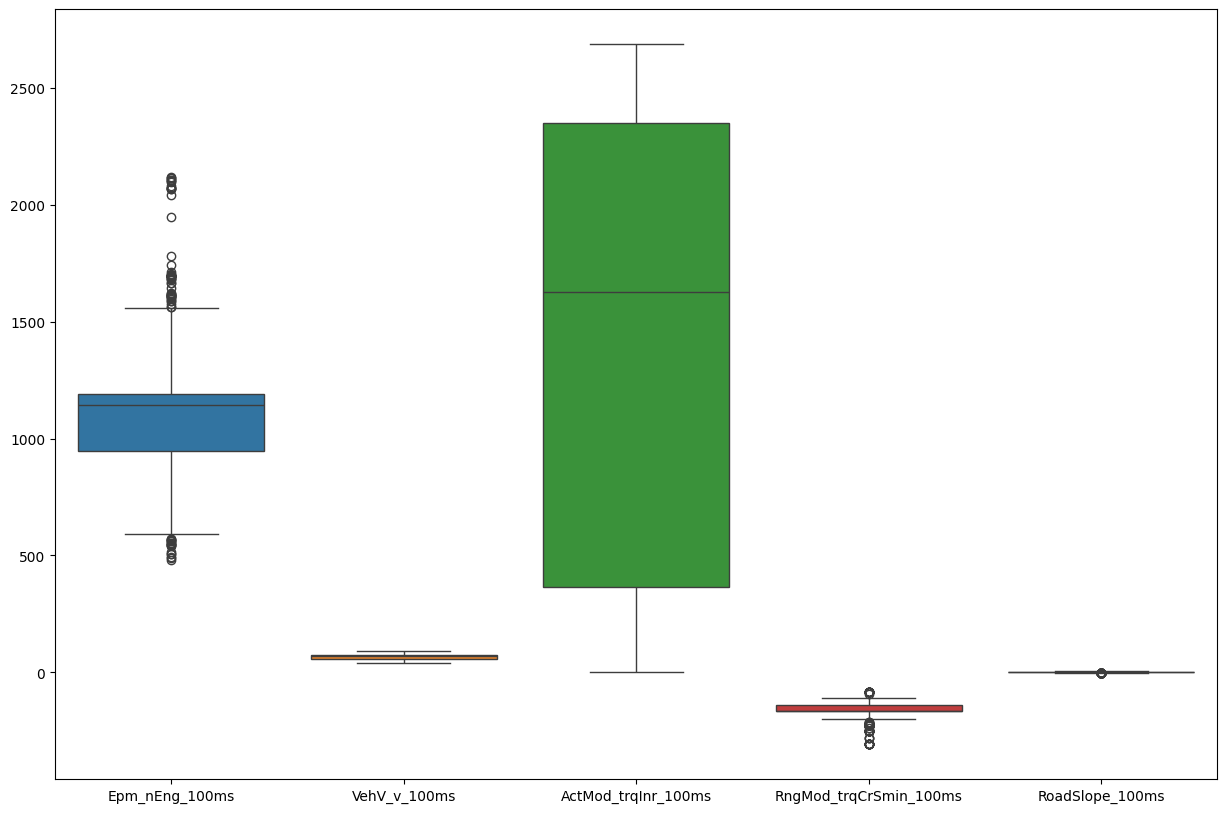

In [ ]:
# Checking for outliers using box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=dataset.drop(columns=["Vehicle_Mass", "CoVeh_trqAcs_100ms", "Clth_st_100ms", "CoEng_st_100ms", "Com_rTSC1VRVCURtdrTq_100ms", "Com_rTSC1VRRDTrqReq_100ms"]))  # Excluding the label column for this analysis
# plt.xticks(rotation=45)
# plt.title("Box Plot of Feature Columns")
plt.show()

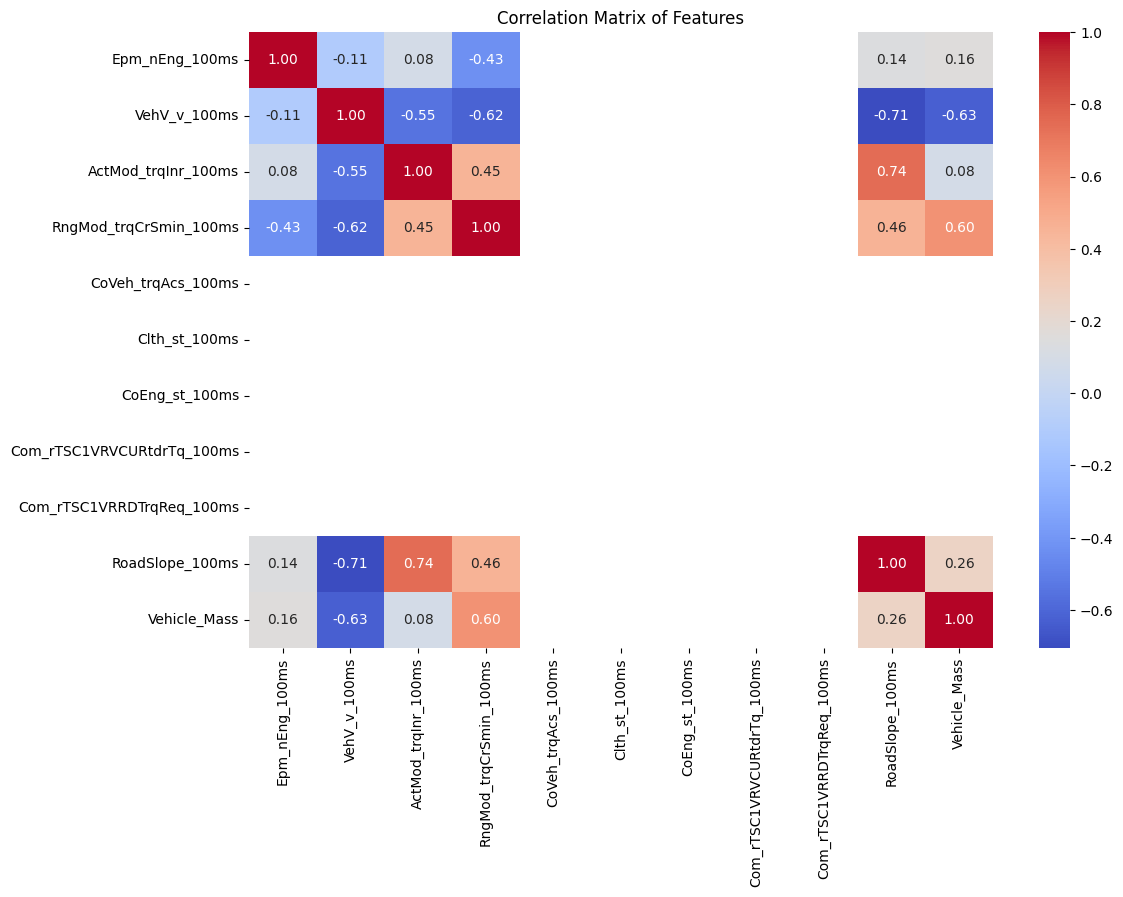

,RoadSlope_100ms,Vehicle_Mass
RoadSlope_100ms,1.000000,0.257673
ActMod_trqInr_100ms,0.743515,0.084114
RngMod_trqCrSmin_100ms,0.459027,0.604168
Vehicle_Mass,0.257673,1.000000
Epm_nEng_100ms,0.138132,0.156700
VehV_v_100ms,-0.705378,-0.630015
CoVeh_trqAcs_100ms,NaN,NaN
Clth_st_100ms,NaN,NaN
CoEng_st_100ms,NaN,NaN
Com_rTSC1VRVCURtdrTq_100ms,NaN,NaN


In [ ]:
# Correlation analysis
correlation_matrix = dataset.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

# Summary of correlations
correlation_summary = correlation_matrix[['RoadSlope_100ms', 'Vehicle_Mass']].sort_values(by='RoadSlope_100ms', ascending=False)
correlation_summary

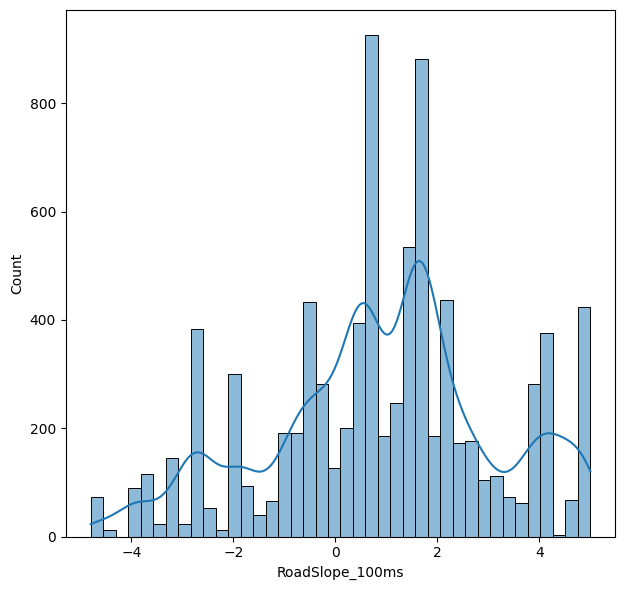

(       Epm_nEng_100ms  VehV_v_100ms  ActMod_trqInr_100ms  \
 count     8496.000000   8496.000000          8496.000000   
 mean      1104.671257     64.349988          1419.595527   
 std        157.267374     10.691505           989.412153   
 min        481.500000     38.310000             0.000000   
 25%        948.375000     57.092500           363.923300   
 50%       1145.000000     67.375000          1627.500000   
 75%       1192.500000     71.580000          2348.739000   
 max       2119.500000     88.930000          2688.000000   
 
        RngMod_trqCrSmin_100ms  CoVeh_trqAcs_100ms  Clth_st_100ms  \
 count             8496.000000        8.496000e+03         8496.0   
 mean              -158.917143        9.999747e+00            0.0   
 std                 26.449961        3.552923e-15            0.0   
 min               -308.000000        9.999747e+00            0.0   
 25%               -168.000000        9.999747e+00            0.0   
 50%               -168.000000     

In [ ]:
# EDA
# Summary statistics
summary_stats = dataset.describe()

# Checking for missing values
missing_values = dataset.isnull().sum()

# Distribution of RoadSlope
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(dataset['RoadSlope_100ms'], kde=True)
# plt.title('Distribution of RoadSlope')

# # Distribution of Vehicle_Mass
# plt.subplot(1, 2, 2)
# sns.countplot(x='Vehicle_Mass', data=dataset)
# plt.title('Distribution of Vehicle_Mass')

plt.tight_layout()
plt.show()

summary_stats, missing_values

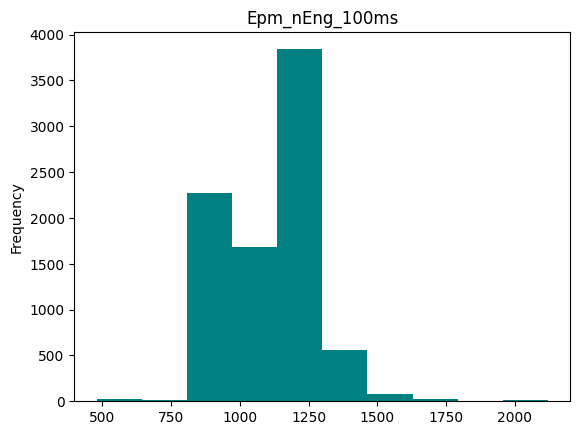

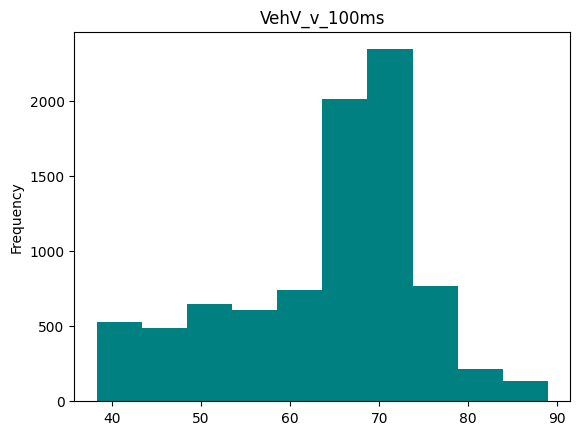

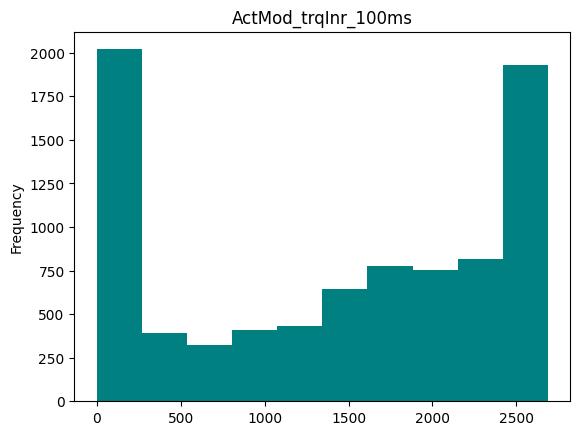

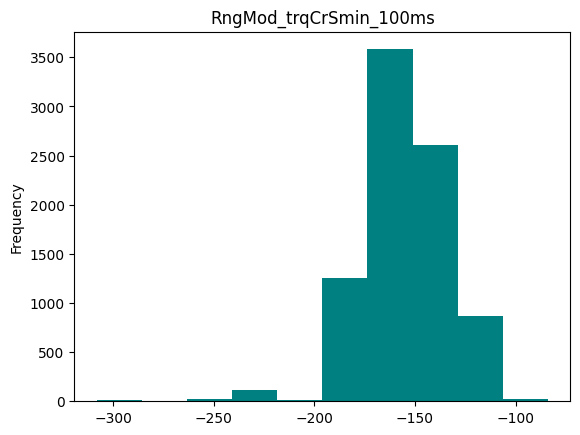

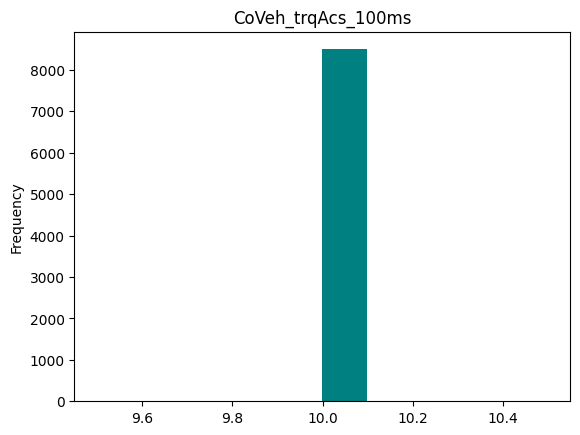

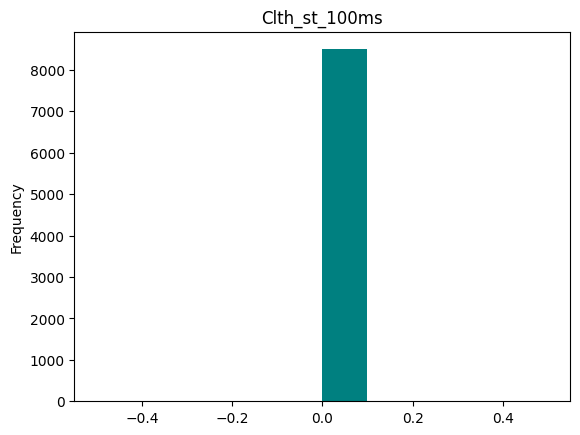

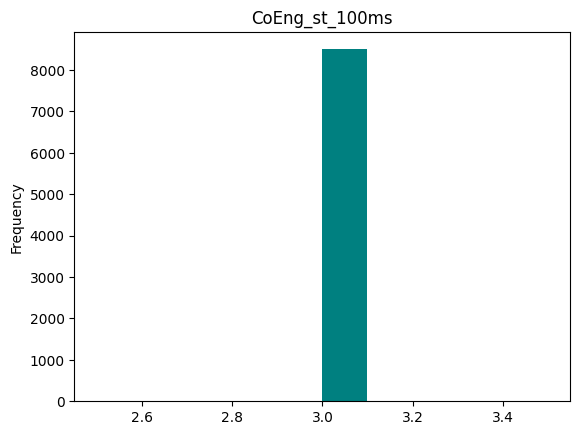

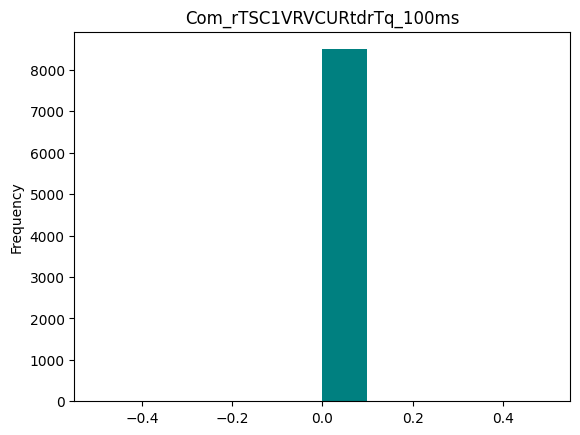

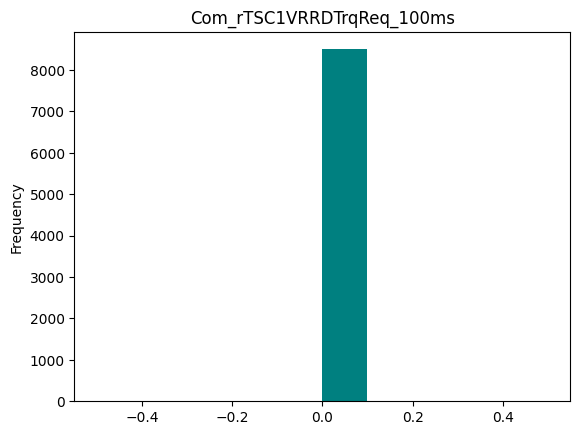

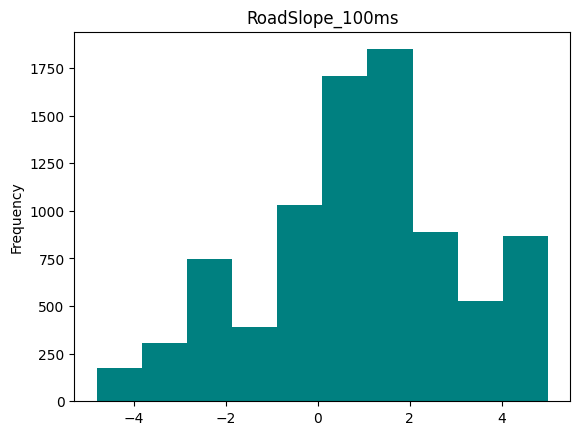

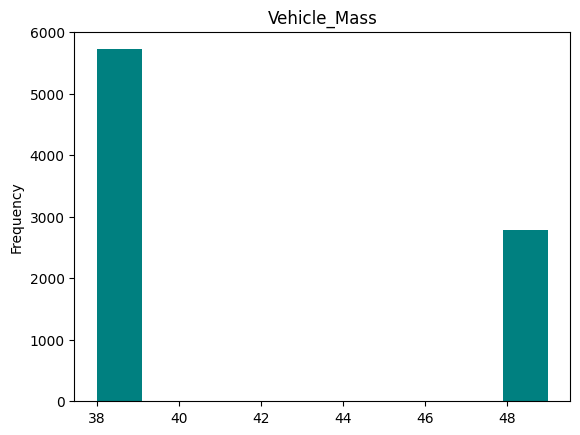

In [ ]:
#EDA
for i in dataset.columns:
    dataset[i].plot.hist(color='teal')
    plt.title(i)
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Drop the unnecessary constant columns
data_cleaned = dataset.drop(['CoVeh_trqAcs_100ms','Clth_st_100ms', 'CoEng_st_100ms',
                          'Com_rTSC1VRVCURtdrTq_100ms', 'Com_rTSC1VRRDTrqReq_100ms'], axis=1)

# Reformat the 'Vehicle_Mass' column to binary format
original_vm = data_cleaned['Vehicle_Mass']
data_cleaned['Vehicle_Mass'] = data_cleaned['Vehicle_Mass'].map({38: 0, 49: 1})
# Split the data into features and targets for regression and classification
X_regress = data_cleaned.drop(['RoadSlope_100ms',], axis=1)
y_regress = data_cleaned['RoadSlope_100ms']
# X_regress['Vehicle_Mass'] = original_vm


X_classify = X_regress.drop(['Vehicle_Mass'],axis = 1)  # The features are the same for both tasks
y_classify = data_cleaned['Vehicle_Mass']

X_classify['Combined_Veh_Rng'] = 1 / X_classify['VehV_v_100ms'] * X_classify['RngMod_trqCrSmin_100ms']

# Use the same features set for both classification and regression tasks
X_regress = X_classify
# X_regress = pd.get_dummies(X_regress, columns=['Vehicle_Mass'], drop_first=True)

# Drop the original 'Vehicle_Mass' column from the features

# Split the dataset into train, development, and test sets for both tasks
# Regression task splits
X_train_regress, X_temp_regress, y_train_regress, y_temp_regress = train_test_split(
    X_regress, y_regress, test_size=0.3, random_state=42)

X_dev_regress, X_test_regress, y_dev_regress, y_test_regress = train_test_split(
    X_temp_regress, y_temp_regress, test_size=0.5, random_state=42)

# Classification task splits
X_train_classify, X_temp_classify, y_train_classify, y_temp_classify = train_test_split(
    X_classify, y_classify, test_size=0.3, random_state=42)

X_dev_classify, X_test_classify, y_dev_classify, y_test_classify = train_test_split(
    X_temp_classify, y_temp_classify, test_size=0.5, random_state=42)

# Check the size of each split to confirm the operation
split_sizes_regress = (X_train_regress.shape, X_dev_regress.shape, X_test_regress.shape)
split_sizes_classify = (X_train_classify.shape, X_dev_classify.shape, X_test_classify.shape)

split_sizes_regress, split_sizes_classify

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler, Normalizer, PowerTransformer, QuantileTransformer

# Initialize the RobustScaler
scaler_regress = RobustScaler()
scaler_classify = RobustScaler()

# Fit the scaler on the training data and transform training data
X_train_regress_scaled = scaler_regress.fit_transform(X_train_regress)
X_train_classify_scaled = scaler_classify.fit_transform(X_train_classify)

# Transform the development and test data with the same scaler
X_dev_regress_scaled = scaler_regress.transform(X_dev_regress)
X_test_regress_scaled = scaler_regress.transform(X_test_regress)

X_dev_classify_scaled = scaler_classify.transform(X_dev_classify)
X_test_classify_scaled = scaler_classify.transform(X_test_classify)

# Check the mean and standard deviation of the scaled features for regression
train_regress_scaled_mean = X_train_regress_scaled.mean(axis=0)
train_regress_scaled_std = X_train_regress_scaled.std(axis=0)

# Check the mean and standard deviation of the scaled features for classification
train_classify_scaled_mean = X_train_classify_scaled.mean(axis=0)
train_classify_scaled_std = X_train_classify_scaled.std(axis=0)

train_regress_scaled_mean, train_regress_scaled_std, train_classify_scaled_mean, train_classify_scaled_std



(array([0.49998795, 0.50000437, 0.47889109, 0.50009752, 0.50000253]),
 array([0.28874323, 0.28872974, 0.31789098, 0.27350142, 0.28871319]),
 array([0.49998795, 0.50000437, 0.47889109, 0.50009752, 0.50000253]),
 array([0.28874323, 0.28872974, 0.31789098, 0.27350142, 0.28871319]))

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

def calculate_regression_score(y_pred, y_true):
    # Calculate the absolute error
    e = np.abs(y_pred - y_true)
    # Determine the points based on the error
    points = np.where(e < 0.001, 1.0,
                      np.where(e < 0.010, 0.50,
                               np.where(e < 0.020, 0.25,
                                        np.where(e < 0.050, 0.0,
                                                 np.where(e < 0.300, -0.25, -0.50)))))
    # The score is the average number of points
    return np.mean(points)

def calculate_classification_score(y_true, y_pred):
    # Compute confusion matrix to get TP and FN for each class
    tp_fn = confusion_matrix(y_true, y_pred).ravel()
    # Calculate recall for each class
    recall_0 = tp_fn[0] / (tp_fn[0] + tp_fn[2])  # TP_0 / (TP_0 + FN_0)
    recall_1 = tp_fn[3] / (tp_fn[3] + tp_fn[1])  # TP_1 / (TP_1 + FN_1)
    # Calculate the geometric mean of the two recall values
    return np.sqrt(recall_0 * recall_1)

def calculate_combined_score(regression_score, classification_score):
    # Sum of regression and classification scores
    return regression_score + classification_score

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# Initialize models for classification
svc_classifier = SVC(probability=True)
logistic_classifier = LogisticRegression()
random_forest_classifier = RandomForestClassifier(random_state=42, n_estimators=50)
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Train and evaluate models on the development set for classification
models_classify = {
    'SVC': svc_classifier,
    'Logistic Regression': logistic_classifier,
    'Decision Tree Classification': decision_tree_classifier,
    'Random Forest Classification': random_forest_classifier
}

# Dictionary to store the development scores for classification models
dev_scores_classify = {}

for model_name, model in models_classify.items():
    # Train the model
    model.fit(X_train_classify_scaled, y_train_classify)
    # Predict on the development set
    y_dev_pred = model.predict(X_dev_classify_scaled)
    # Calculate the score for the development set
    classification_score_dev = calculate_classification_score(y_dev_classify, y_dev_pred)
    # Store the score
    dev_scores_classify[model_name] = classification_score_dev

dev_scores_classify

{'SVC': 0.9939169270870514,
 'Logistic Regression': 0.9734140438151142,
 'Decision Tree Classification': 0.9941359889959945,
 'Random Forest Classification': 0.9993908010400188}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, confusion_matrix

# Create a RandomForestClassifier instance
random_forest_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'max_samples': [None, 0.7, 0.8, 0.9]
}
scorer = make_scorer(calculate_classification_score,greater_is_better= True)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=random_forest_classifier, param_grid=param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train_classify_scaled, y_classify)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# # Train the model with the best parameters
# best_random_forest = RandomForestClassifier(random_state=42, **best_params)
# best_random_forest.fit(X_train_classify_scaled, y_train_classify)

# y_dev_pred = best_random_forest.predict(X_dev_classify_scaled)
# # Calculate the score for the development set
# classification_score_dev = calculate_classification_score(y_dev_classify, y_dev_pred)
# # Store the score
# classification_score_dev

KeyboardInterrupt: 

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error

# Initialize models for regression
svr_regressor = SVR()
linear_regressor = LinearRegression()
random_forest_regressor = RandomForestRegressor(random_state=42)
extra_trees_regressor = ExtraTreesRegressor(random_state=42)


# Train and evaluate models on the development set for regression
models_regress = {
    'SVR': svr_regressor,
    'Linear Regression': linear_regressor,
    'Random Forest Regression': random_forest_regressor,
    'Extra Trees Regression': extra_trees_regressor
}

# Dictionary to store the development scores for regression models
dev_scores_regress = {}

for model_name, model in models_regress.items():
    # Train the model
    model.fit(X_train_regress_scaled, y_train_regress)
    # Predict on the development set
    y_dev_pred = model.predict(X_dev_regress_scaled)
    # Calculate the score for the development set
    regression_score_dev = mean_absolute_error(y_dev_pred, y_dev_regress)
    # Store the score
    dev_scores_regress[model_name] = regression_score_dev

dev_scores_regress

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, HuberRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
# Initialize additional models for regression
svm_regressor = SVR()
mlp_regressor = MLPRegressor(random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=1, weights="distance",metric="manhattan" )
bagging_regressor = BaggingRegressor(base_estimator=knn_regressor, n_estimators=100, random_state=42)
ridge_regressor = Ridge()
lasso_regressor = Lasso()
huber_regressor = HuberRegressor()
gaussian_process_regressor = GaussianProcessRegressor()
elasticnet_regressor = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=42)
adaboost_regressor = AdaBoostRegressor(base_estimator=knn_regressor, n_estimators=20,learning_rate=1, random_state=42)
gradient_boosting_regressor = GradientBoostingRegressor(init=knn_regressor, n_estimators=5, random_state=42)
xgboost_regressor = xgb.XGBRegressor(base_estimator=knn_regressor, n_estimators=100, random_state=42)
# Add these models to the dictionary
models_regress_best = ({
    'GradBoost': gradient_boosting_regressor,
    'AdaBoost': adaboost_regressor,
    'XGBoost': xgboost_regressor,
    'SVR': svm_regressor,
    'MLP': mlp_regressor,
    'KNN': knn_regressor,
    'ElasticNet': elasticnet_regressor,
    'Bagging': bagging_regressor,
    'Ridge': ridge_regressor,
    'Lasso': lasso_regressor,
})

# Dictionary to store the development scores for regression models
dev_scores_regress = {}
test_scores_regress = {}
for model_name, model in models_regress_best.items():
    # Train the model
    model.fit(X_train_regress_scaled, y_train_regress)

    # Predict on the development set
    y_dev_pred = model.predict(X_dev_regress_scaled)

    # Calculate the score for the development set
    regression_score_dev = calculate_regression_score(y_dev_regress, y_dev_pred)

    # Store the score
    dev_scores_regress[model_name] = regression_score_dev

    y_test_pred = model.predict(X_test_regress_scaled)

    # Calculate the score for the development set
    regression_score_test = calculate_regression_score(y_test_regress, y_test_pred)

    # Store the score
    test_scores_regress[model_name] = regression_score_test

# Continue with the rest of your code...
print(dev_scores_regress)
test_scores_regress

{'KNN': 0.7635400313971743}


{'KNN': 0.7743137254901961}

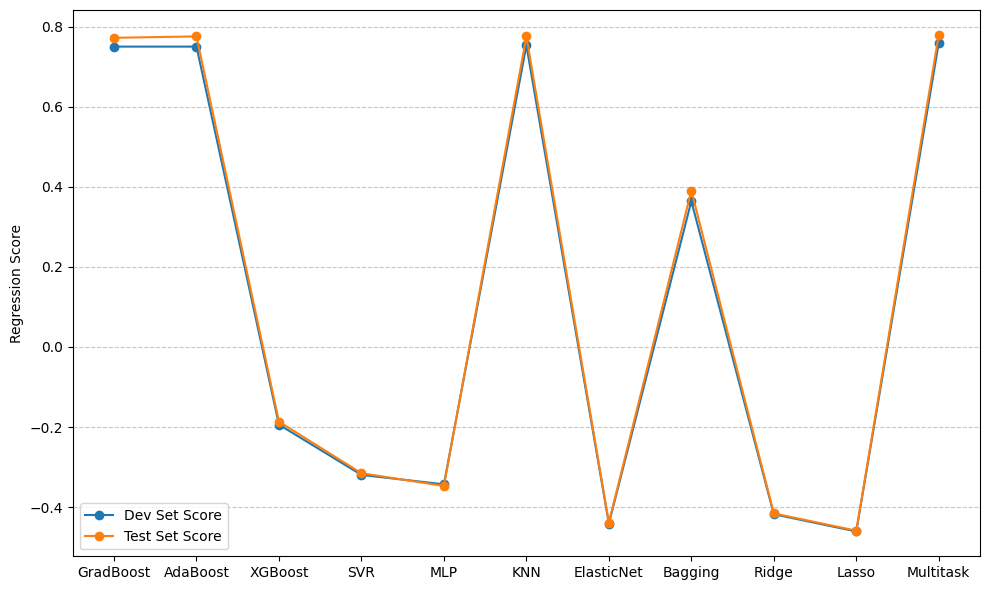

In [ ]:
models = list(models_regress_best.keys())
dev_scores = list(dev_scores_regress.values())
test_scores = list(test_scores_regress.values())

models.append("Multitask")
dev_scores.append(0.76)
test_scores.append(0.78)
plt.figure(figsize=(10, 6))
plt.plot(models, dev_scores, marker='o', label='Dev Set Score', linestyle='-')
plt.plot(models, test_scores, marker='o', label='Test Set Score', linestyle='-')
# plt.xlabel('Models')
plt.ylabel('Regression Score')
# plt.title('Comparison of Models Performance on Dev and Test Sets')
# plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

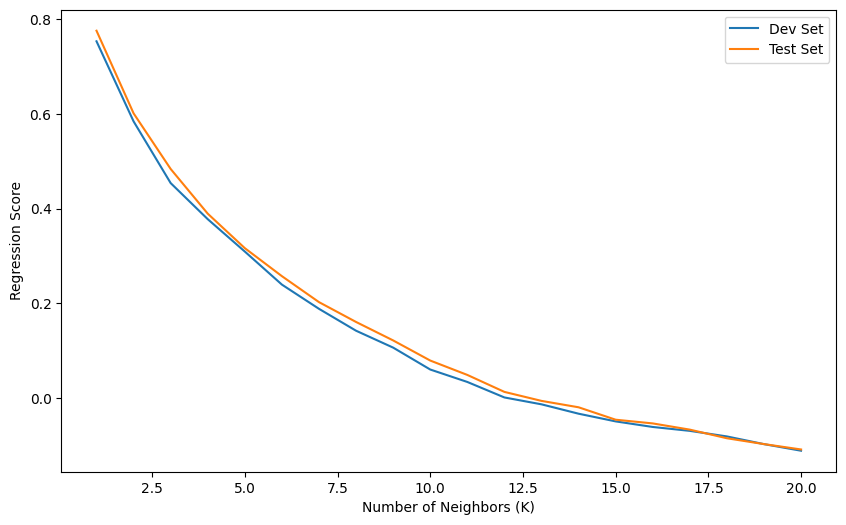

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

rmse_dev = []  # to store rmse values for the dev set
rmse_test = []  # to store rmse values for the test set

for K in range(20):
    K = K + 1
    model = KNeighborsRegressor(n_neighbors=K, weights="uniform", metric="manhattan")

    model.fit(X_train_regress_scaled, y_train_regress)  # fit the model
    y_dev_pred = model.predict(X_dev_regress_scaled)  # make prediction on dev set
    regression_score_dev = calculate_regression_score(y_dev_regress, y_dev_pred)
    rmse_dev.append(regression_score_dev)

    y_test_pred = model.predict(X_test_regress_scaled)  # make prediction on test set
    regression_score_test = calculate_regression_score(y_test_regress, y_test_pred)
    rmse_test.append(regression_score_test)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), rmse_dev, label='Dev Set')
plt.plot(range(1, 21), rmse_test, label='Test Set')
# plt.title('Regression Performance vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Regression Score')
plt.legend()
plt.show()



In [ ]:
# Predict on the test set with the best regression model
y_test_pred_regress = knn_regressor.predict(X_test_regress_scaled)
# Calculate the regression score for the test set
regression_score_test = calculate_regression_score(y_test_pred_regress, y_test_regress)

# Predict on the test set with the best classification model
y_test_pred_classify = random_forest_classifier.predict(X_test_classify_scaled)
# Calculate the classification score for the test set
classification_score_test = calculate_classification_score(y_test_classify, y_test_pred_classify)

# Calculate the combined score for the test set
combined_score_test = calculate_combined_score(regression_score_test, classification_score_test)

regression_score_test, classification_score_test, combined_score_test

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


# Define the KNN model
knn_regressor = KNeighborsRegressor()

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create the grid search
grid_search = GridSearchCV(knn_regressor, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_regress_scaled, y_train_regress)

# Get the best model
best_knn_model = grid_search.best_estimator_

# Predict on the development set
y_dev_pred_knn = best_knn_model.predict(X_dev_regress_scaled)

# Calculate the score for the development set
msqe_dev_knn = mean_squared_error(y_dev_regress, y_dev_pred_knn)
regression_score_dev = calculate_regression_score(y_dev_regress, y_dev_pred_knn)

print(f'Mean Squared Error on Development Set (KNN Regression): {msqe_dev_knn}')
print(f'Regression Score (KNN Regression): {regression_score_dev}')

best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')


In [ ]:
# Predict on the test set with the best regression model
y_test_pred_regress = best_knn_model.predict(X_test_regress_scaled)
# Calculate the regression score for the test set
regression_score_test = calculate_regression_score(y_test_pred_regress, y_test_regress)

# Predict on the test set with the best classification model
y_test_pred_classify = random_forest_classifier.predict(X_test_classify_scaled)
# Calculate the classification score for the test set
classification_score_test = calculate_classification_score(y_test_classify, y_test_pred_classify)

# Calculate the combined score for the test set
combined_score_test = calculate_combined_score(regression_score_test, classification_score_test)

regression_score_test, classification_score_test, combined_score_test